In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import scipy
import math
import pandas_ta as ta
import yfinance as yf
import datetime
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
import ipywidgets as widgets


In [2]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel("./../Data/Cac40.xlsx")

In [4]:
df.head()

,Symbol,Nom Entreprise,Secteur d'activite,Pays,Action/ETF
0,MC.PA,"LVMH Moët Hennessy - Louis Vuitton, Société Eu...",Textile Habillement Accessoires,FR,Action
1,HO.PA,Thales S.A.,Aéronautique Espace Armement,FR,Action
2,AIR.PA,Airbus SE,Aéronautique Espace Armement,FR,Action
3,ORA.PA,Orange S.A.,Télécommunication,FR,Action
4,EN.PA,Bouygues SA,Conglomérat,FR,Action


In [5]:
df[df.Symbol == "BNP.PA"]

,Symbol,Nom Entreprise,Secteur d'activite,Pays,Action/ETF
10,BNP.PA,BNP Paribas SA,Banque,FR,Action


In [129]:
gle = yf.Ticker("^IXIC")

In [130]:
gle.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 18291.617,
 'open': 18200.6,
 'dayLow': 18154.18,
 'dayHigh': 18333.387,
 'regularMarketPreviousClose': 18291.617,
 'regularMarketOpen': 18200.6,
 'regularMarketDayLow': 18154.18,
 'regularMarketDayHigh': 18333.387,
 'volume': 3095913000,
 'regularMarketVolume': 3095913000,
 'averageVolume': 5542938437,
 'averageVolume10days': 5463283000,
 'averageDailyVolume10Day': 5463283000,
 'fiftyTwoWeekLow': 12543.86,
 'fiftyTwoWeekHigh': 18671.07,
 'fiftyDayAverage': 17515.523,
 'twoHundredDayAverage': 16664.98,
 'currency': 'USD',
 'exchange': 'NIM',
 'quoteType': 'INDEX',
 'symbol': '^IXIC',
 'underlyingSymbol': '^IXIC',
 'shortName': 'NASDAQ Composite',
 'longName': 'NASDAQ Composite',
 'firstTradeDateEpochUtc': 34612200,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': '6b51a47d-53e9-30d4-8a47-289ac3188b0f',
 'messageBoardId': 'finmb_INDEXIXIC',
 'gmtOffSetMilliseconds': -14400000,
 'trailingPegRatio': None}

In [92]:
gle.history_metadata

{'currency': 'USD',
 'symbol': 'BTC',
 'exchangeName': 'PCX',
 'fullExchangeName': 'NYSEArca',
 'instrumentType': 'ETF',
 'firstTradeDate': 1722432600,
 'regularMarketTime': 1728576965,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 5.385,
 'fiftyTwoWeekHigh': 5.41,
 'fiftyTwoWeekLow': 5.35,
 'regularMarketDayHigh': 5.41,
 'regularMarketDayLow': 5.35,
 'regularMarketVolume': 2822791,
 'longName': 'Grayscale Bitcoin Mini Trust (BTC)',
 'shortName': 'Grayscale Bitcoin Mini Trust (B',
 'chartPreviousClose': 5.41,
 'previousClose': 5.4,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1728547200,
   'end': 1728567000,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1728567000,
   'end': 1728590400,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1728590400,
   'end': 1728604800,
   'gmtoffset': -14400}},
 'tradi

In [23]:
gle.news

[{'uuid': '9049cfa1-fd73-3233-b608-f4f1e45f5ae4',
  'title': 'Keefe Bruyette & Woods Adjusts Nasdaq Price Target to $85 From $78, Maintains Outperform Rating',
  'publisher': 'MT Newswires',
  'link': 'https://finance.yahoo.com/news/keefe-bruyette-woods-adjusts-nasdaq-120703752.html',
  'providerPublishTime': 1728562023,
  'type': 'STORY'},
 {'uuid': 'ca8c3d5c-1b96-3d63-8f0e-9c338c285d1b',
  'title': 'Market Chatter: Advanced Micro Devices Expected to Unveil New AI Chips at San Francisco Event',
  'publisher': 'MT Newswires',
  'link': 'https://finance.yahoo.com/news/market-chatter-advanced-micro-devices-120703917.html',
  'providerPublishTime': 1728562023,
  'type': 'STORY',
  'relatedTickers': ['AMD']},
 {'uuid': '5faee4b0-0e1e-3ef9-a227-1ad76dd0fe00',
  'title': 'Clearmind Medicine Announces IRB Approval for FDA First-In-Human Clinical Trial of CMND-100 at Second Clinical Site',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/clearmind-medicine-announces-ir

In [131]:
stocks_gle = gle.history(period="1y")
stocks_gle.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-10 00:00:00-04:00,13505.809570,13659.629883,13491.809570,13562.839844,4301350000,0.0,0.0
2023-10-11 00:00:00-04:00,13619.209961,13671.110352,13549.290039,13659.679688,4160440000,0.0,0.0
2023-10-12 00:00:00-04:00,13672.469727,13714.139648,13491.559570,13574.219727,4858620000,0.0,0.0
2023-10-13 00:00:00-04:00,13613.589844,13619.540039,13361.849609,13407.230469,4251550000,0.0,0.0
2023-10-16 00:00:00-04:00,13453.809570,13598.049805,13447.169922,13567.980469,4308690000,0.0,0.0


In [151]:
def find_levels( 
        price: np.array, atr: float, # Log closing price, and log atr 
        first_w: float = 0.1, 
        atr_mult: float = 3.0, 
        prom_thresh: float = 0.1
):

    # Setup weights
    last_w = 1.0
    w_step = (last_w - first_w) / len(price)
    weights = first_w + np.arange(len(price)) * w_step
    weights[weights < 0] = 0.0

    # Get kernel of price. 
    kernal = scipy.stats.gaussian_kde(price, bw_method=atr*atr_mult, weights=weights)

    # Construct market profile
    min_v = np.min(price)
    max_v = np.max(price)
    step = (max_v - min_v) / 200
    price_range = np.arange(min_v, max_v, step)
    pdf = kernal(price_range) # Market profile

    # Find significant peaks in the market profile
    pdf_max = np.max(pdf)
    prom_min = pdf_max * prom_thresh

    peaks, props = scipy.signal.find_peaks(pdf, prominence=prom_min)
    levels = [] 
    for peak in peaks:
        levels.append(np.exp(price_range[peak]))

    return levels, peaks, props, price_range, pdf, weights




def support_resistance_levels(
        data: pd.DataFrame, lookback: int, 
        first_w: float = 0.01, atr_mult:float=3.0, prom_thresh:float =0.25
):

    # Get log average true range, 
    atr = ta.atr(np.log(data['High']), np.log(data['Low']), np.log(data['Close']), lookback)

    all_levels = [None] * len(data)
    for i in range(lookback, len(data)):
        i_start  = i - lookback
        vals = np.log(data.iloc[i_start+1: i+1]['Close'].to_numpy())
        levels, peaks, props, price_range, pdf, weights= find_levels(vals, atr.iloc[i], first_w, atr_mult, prom_thresh)
        all_levels[i] = levels
        
    return all_levels

def sr_penetration_signal(data: pd.DataFrame, levels: list):
    signal = np.zeros(len(data))
    curr_sig = 0.0
    close_arr = data['Close'].to_numpy()
    for i in range(1, len(data)):
        if levels[i] is None:
            continue

        last_c = close_arr[i - 1]
        curr_c = close_arr[i]

        
        for level in levels[i]:
            if curr_c > level and last_c <= level: # Close cross above line
                curr_sig = 1.0
            elif curr_c < level and last_c >= level: # Close cross below line
                curr_sig = -1.0

        signal[i] = curr_sig
    return signal

def get_trades_from_signal(data: pd.DataFrame, signal: np.array):
    long_trades = []
    short_trades = []

    close_arr = data['Close'].to_numpy()
    last_sig = 0.0
    open_trade = None
    idx = data.index
    for i in range(len(data)):
        if signal[i] == 1.0 and last_sig != 1.0: # Long entry
            if open_trade is not None:
                open_trade[2] = idx[i] 
                open_trade[3] = close_arr[i]
                short_trades.append(open_trade)

            open_trade = [idx[i], close_arr[i], -1, np.nan]
        if signal[i] == -1.0  and last_sig != -1.0: # Short entry
            if open_trade is not None:
                open_trade[2] = idx[i] 
                open_trade[3] = close_arr[i]
                long_trades.append(open_trade)

            open_trade = [idx[i], close_arr[i], -1, np.nan]

        last_sig = signal[i]

    long_trades = pd.DataFrame(long_trades, columns=['entry_time', 'entry_price', 'exit_time', 'exit_price'])
    short_trades = pd.DataFrame(short_trades, columns=['entry_time', 'entry_price', 'exit_time', 'exit_price'])

    long_trades['percent'] = (long_trades['exit_price'] - long_trades['entry_price']) / long_trades['entry_price'] 
    short_trades['percent'] = -1 * (short_trades['exit_price'] - short_trades['entry_price']) / short_trades['entry_price']
    long_trades = long_trades.set_index('entry_time')
    short_trades = short_trades.set_index('entry_time')
    return long_trades, short_trades 

In [132]:
# method to grab data and plot the data
def plot_stocks_df(stocks, period='1d' , interval='1m'):
    for stock in stocks:
        plt.figure()
        temp = yf.Ticker(stock)
        hist = yf.download(tickers=stock, period=period, interval=interval)

        mpf.plot(hist, type='candle',
            volume=True, mav=(20,5),title = stock+" "+datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            tight_layout=True, figratio=(10,5))
        globals()[f"plot_{stock}_{interval}"] = plt.gcf()

In [36]:
# valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
period = '1d'

 # valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
interval = '5m'

stocks = df.Symbol[:5]

[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

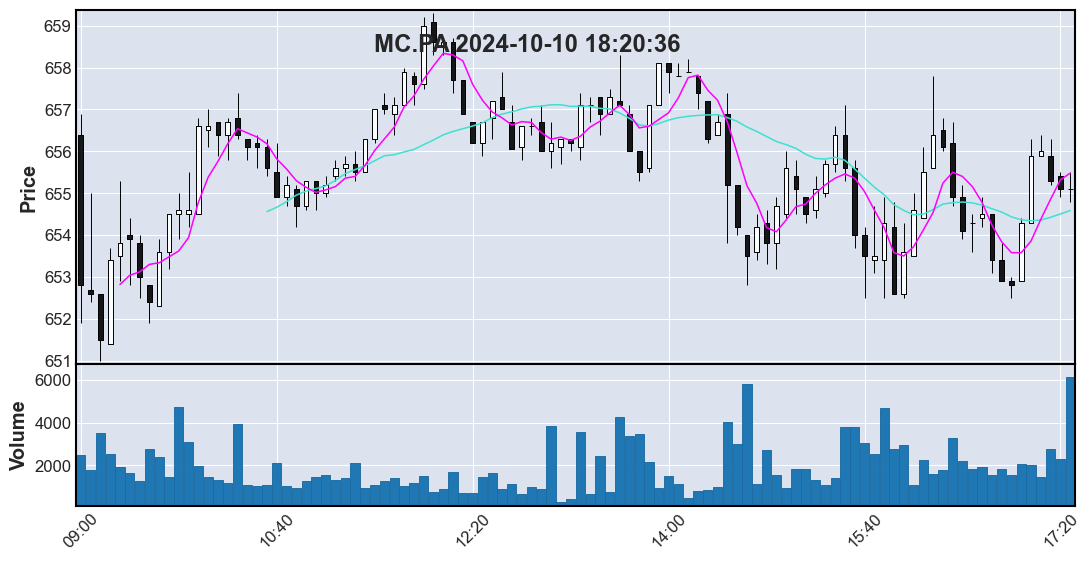

[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

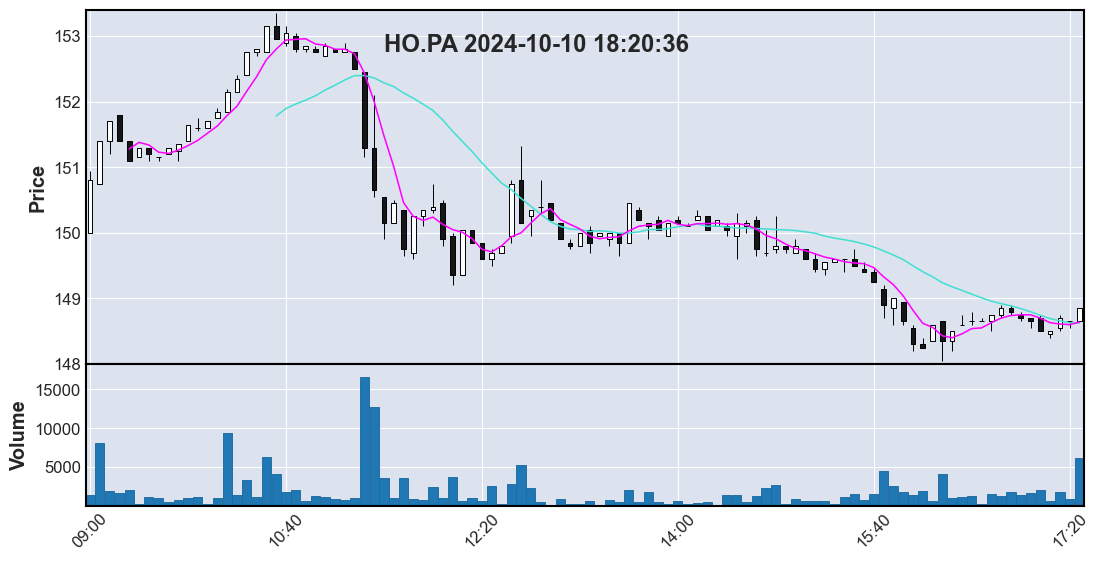

[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

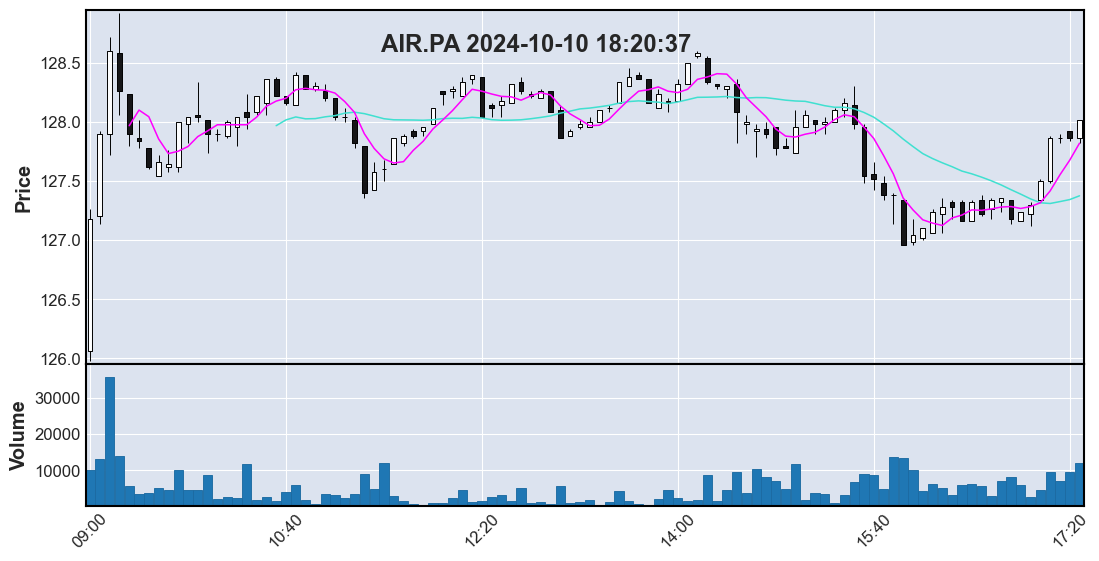

[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

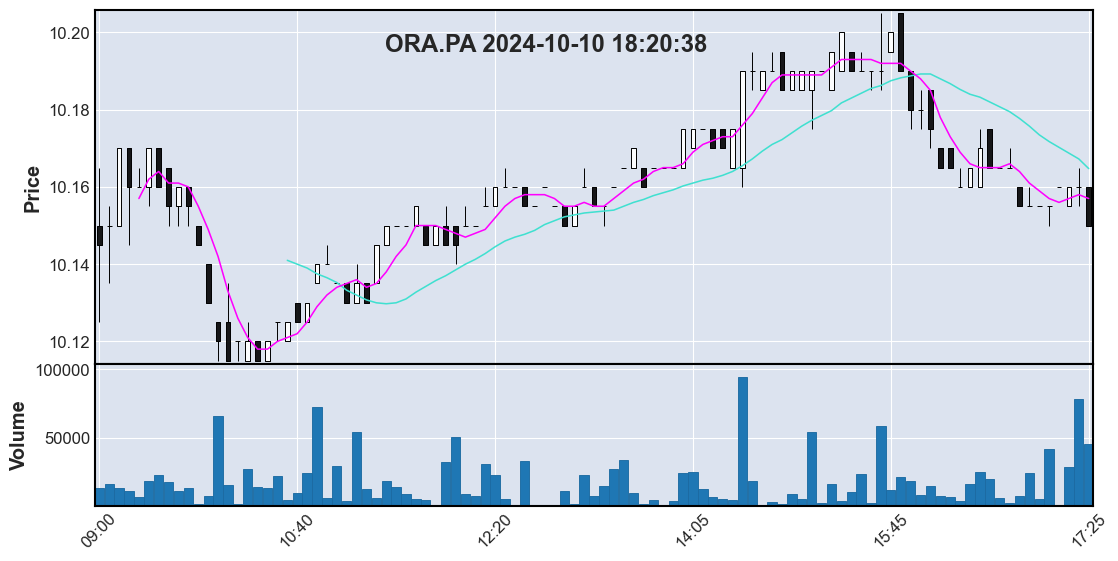

[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

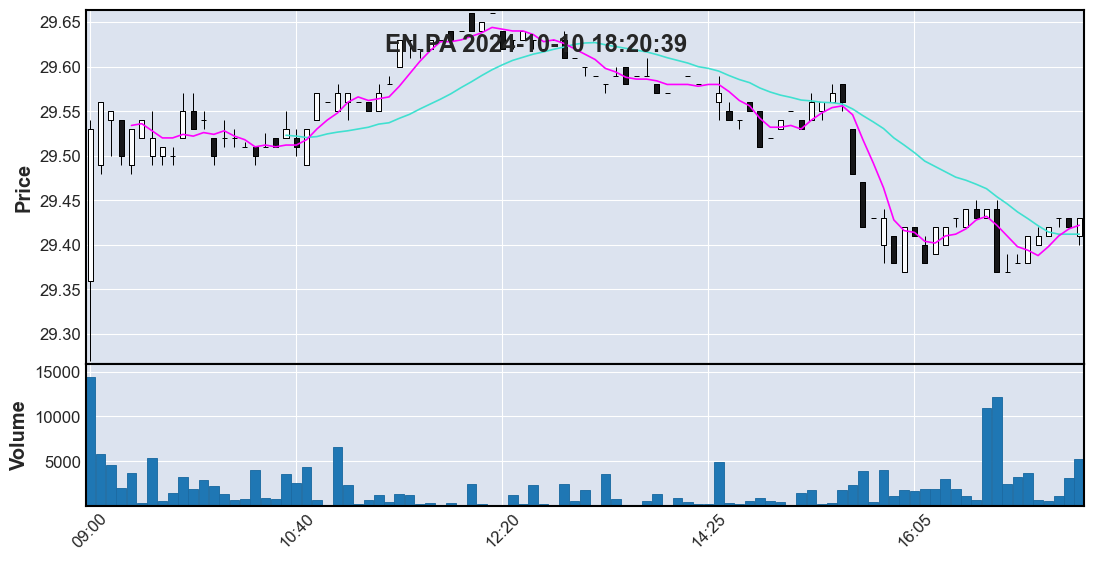

<Figure size 640x480 with 0 Axes>

In [98]:
plot_stocks_df(stocks, period, interval)

In [159]:
levels = support_resistance_levels(stocks_gle, 10, first_w=1.0, atr_mult=3.0)

stocks_gle['sr_signal'] = sr_penetration_signal(stocks_gle, levels)
stocks_gle['log_ret'] = np.log(stocks_gle['Close']).diff().shift(-1)
stocks_gle['sr_return'] = stocks_gle['sr_signal'] * stocks_gle['log_ret']

long_trades, short_trades = get_trades_from_signal(stocks_gle, stocks_gle['sr_signal'].to_numpy())
print(long_trades, short_trades)

                            entry_price                 exit_time  \
entry_time                                                          
2023-10-24 00:00:00-04:00  13139.870117 2023-10-25 00:00:00-04:00   
2023-10-27 00:00:00-04:00  12643.009766 2023-11-13 00:00:00-05:00   
2023-11-14 00:00:00-05:00  14094.379883 2023-11-27 00:00:00-05:00   
2023-11-28 00:00:00-05:00  14281.759766 2023-11-29 00:00:00-05:00   
2023-12-01 00:00:00-05:00  14305.030273 2023-12-04 00:00:00-05:00   
2023-12-05 00:00:00-05:00  14229.910156 2023-12-06 00:00:00-05:00   
2023-12-07 00:00:00-05:00  14339.990234 2023-12-20 00:00:00-05:00   
2023-12-21 00:00:00-05:00  14963.870117 2023-12-28 00:00:00-05:00   
2024-01-08 00:00:00-05:00  14843.769531 2024-01-16 00:00:00-05:00   
2024-01-18 00:00:00-05:00  15055.650391 2024-01-26 00:00:00-05:00   
2024-01-29 00:00:00-05:00  15628.040039 2024-01-31 00:00:00-05:00   
2024-02-01 00:00:00-05:00  15361.639648 2024-02-05 00:00:00-05:00   
2024-02-06 00:00:00-05:00  15609.0

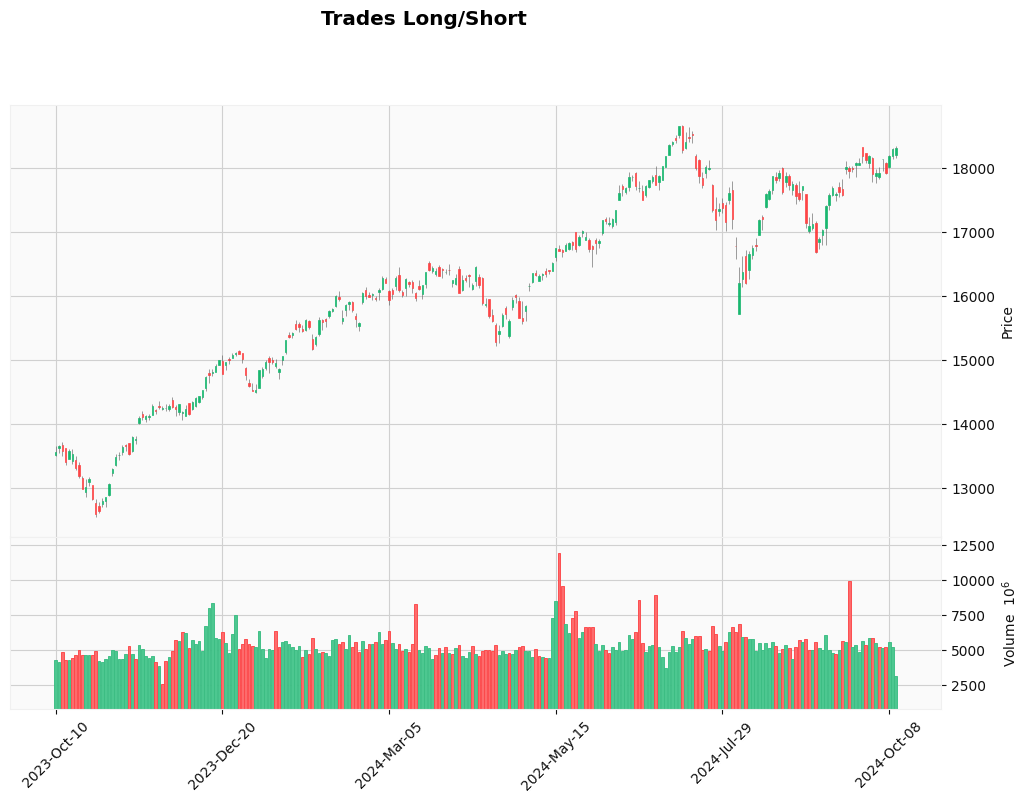

In [160]:
# Préparer les données pour mplfinance (il faut que l'index soit une date)
stocks_gle.index = pd.to_datetime(stocks_gle.index)

# Initialiser les listes de signaux comme des tableaux remplis de NaN
long_signals = np.full(stocks_gle.shape[0], np.nan)
short_signals = np.full(stocks_gle.shape[0], np.nan)

# S'assurer que long_trades et short_trades ne sont pas vides
if len(long_trades) > 0:
    long_signals = np.where(stocks_gle.index.isin(long_trades), stocks_gle['Close'], np.nan)

if len(short_trades) > 0:
    short_signals = np.where(stocks_gle.index.isin(short_trades), stocks_gle['Close'], np.nan)

# Créer les annotations pour les trades longs (vert) et courts (rouge)
ap = []

if not np.isnan(long_signals).all():
    ap.append(mpf.make_addplot(long_signals, type='scatter', markersize=200, color='lime', marker='^', panel=0))

if not np.isnan(short_signals).all():
    ap.append(mpf.make_addplot(short_signals, type='scatter', markersize=200, color='red', marker='v', panel=0))

# Paramètres pour rendre le graphique plus grand et lisible
mpf.plot(stocks_gle, type='candle', style='yahoo', addplot=ap, title="Trades Long/Short",
         ylabel='Price', volume=True, figratio=(12,8), figscale=1.5)

In [161]:
print(f"Ratio Long Trade : {long_trades.percent.sum()}")
print(f"Ratio Short Trade : {short_trades.percent.sum()}")

Ratio Long Trade : 0.18297719861057105
Ratio Short Trade : -0.1588195559164925


In [1]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import yfinance as yf
import plotly.graph_objs as go
import numpy as np
import pandas as pd

# Initialiser l'application Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Liste des symboles boursiers à filtrer
symbols = df['Symbol'].unique()

# Mise en page de l'application
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            html.H3("Sélectionnez un symbole boursier:"),
            dcc.Dropdown(
                id='symbol-selector',
                options=[{'label': symbol, 'value': symbol} for symbol in symbols],
                value=symbols[0]  # Initialiser avec le premier symbole
            )
        ], width=4)
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='stock-chart')
        ], width=12)
    ])
])

# Callback pour mettre à jour le graphique en fonction du symbole sélectionné
@app.callback(
    Output('stock-chart', 'figure'),
    [Input('symbol-selector', 'value')]
)
def update_graph(selected_symbol):
    # Télécharger les données boursières
    data = yf.Ticker(selected_symbol)
    stocks_data = data.history(period="1y")
    
    # Calculer les niveaux de support/résistance et les signaux
    levels = support_resistance_levels(stocks_data, 10, first_w=1.0, atr_mult=3.0)
    stocks_data['sr_signal'] = sr_penetration_signal(stocks_data, levels)
    stocks_data['log_ret'] = np.log(stocks_data['Close']).diff().shift(-1)
    stocks_data['sr_return'] = stocks_data['sr_signal'] * stocks_data['log_ret']

    long_trades, short_trades = get_trades_from_signal(stocks_data, stocks_data['sr_signal'].to_numpy())

    # Créer les signaux long et short
    long_signals = np.where(stocks_data.index.isin(long_trades), stocks_data['Close'], np.nan)
    short_signals = np.where(stocks_data.index.isin(short_trades), stocks_data['Close'], np.nan)

    # S'assurer que long_trades et short_trades ne sont pas vides
    if len(long_trades) > 0:
        long_signals = np.where(stocks_data.index.isin(long_trades), stocks_data['Close'], np.nan)

    if len(short_trades) > 0:
        short_signals = np.where(stocks_data.index.isin(short_trades), stocks_data['Close'], np.nan)

    # Créer les annotations pour les trades longs (vert) et courts (rouge)
    ap = []

    if not np.isnan(long_signals).all():
        ap.append(mpf.make_addplot(long_signals, type='scatter', markersize=200, color='lime', marker='^', panel=0))

    if not np.isnan(short_signals).all():
        ap.append(mpf.make_addplot(short_signals, type='scatter', markersize=200, color='red', marker='v', panel=0))

    # Paramètres pour rendre le graphique plus grand et lisible
    mpf.plot(stocks_data, type='candle', style='yahoo', addplot=ap, title="Trades Long/Short",
             ylabel='Price', volume=True, figratio=(12,8), figscale=1.5)

    print(long_trades.percent.sum(), short_trades.percent.sum())

# Lancer l'application Dash (uniquement si en dehors de Jupyter)
if __name__ == '__main__':
    app.run_server(debug=True)


NameError: name 'df' is not defined